In [2]:
# Data source: https://www.dukascopy.com/swiss/english/marketwatch/historical/
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
from pathlib import Path
csvpath = Path('../Resources/USD_per_Euro_Hourly_Mid_Prices.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Gmt time')
df.head(2)

,Rate
Gmt time,
2014-01-01 00:00:00,1.37439
2014-01-01 01:00:00,1.37439


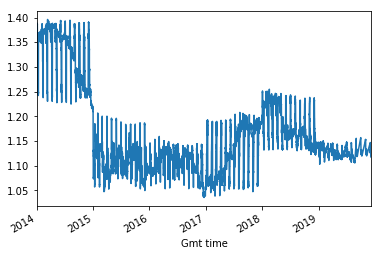

In [4]:
# Hourly EUR to USD exchange rates
df.Rate.plot()

In [6]:
# Hourly percentage changes in exchange rate (resampled to daily)
df['Return'] = df.Rate.pct_change() * 100 * 24
df = df.resample('D').mean()
df = df.dropna()
df.head()

,Rate,Return
Gmt time,,
2014-01-01,1.374557,0.167748
2014-01-02,1.348635,-0.006302
2014-01-03,1.380160,-0.001811
2014-01-04,1.378907,0.141308
2014-01-05,1.387214,0.014192


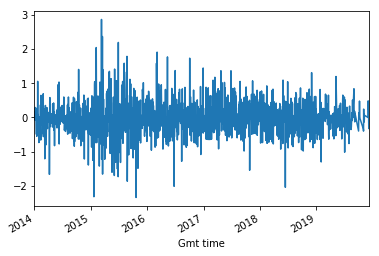

In [7]:
df.Return.plot()

In [8]:
returns = df.loc['2014':'2019'].Rate.pct_change() * 100
returns = returns.dropna()
returns.tail()

Gmt time
2019-12-04    0.215841
2019-12-05   -0.570697
2019-12-06    0.718189
2019-12-07   -0.457071
2019-12-08   -0.512606
Name: Rate, dtype: float64

# GARCH

In [9]:
from arch import arch_model

In [17]:
# Create the GARCH model
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=2)

In [18]:
# Output the model summary
res = model.fit(disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4118.48
Distribution:                  Normal   AIC:                           8246.96
Method:            Maximum Likelihood   BIC:                           8275.12
                                        No. Observations:                 2061
Date:                Mon, Nov 09 2020   Df Residuals:                     2056
Time:                        21:13:36   Df Model:                            5
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.2794e-09  5.570e-03  2.297e-07      1.000 [-1.092e-02,1.092e-02]
alpha[1]       0.0156  5.046e-03      3.101  1.930e-03  [5.756e-03,2.554e-02]
alpha[2]   1.8337e-09  3.670e-03  4.997e-07      1.000 [-7.193e-03,7.193e-03]
beta[1]    2.3183e-09  8.545e-03  2.713e-07      1.000 [-1.675e-02,1.675e-02]
beta[2]        0.9831  9.912e-03     99.175      0.000      [  0.964,  1.002]
=============================================================================

Covariance estimator: robust
"""

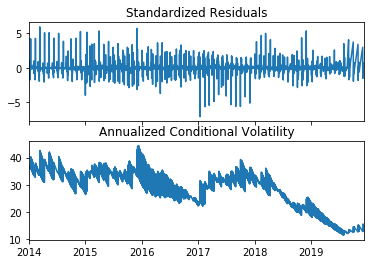

In [19]:
# Plot the model estimate of annualized volatility
fig = res.plot(annualize='D')

# Forecasting from GARCH

In [12]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

'2019-12-08'

In [13]:
# Create a 5 day forecast of EUR to USD exchange rate volatility
forecast_horizon = 5

# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = res.forecast(start='2019-12-08', horizon=forecast_horizon)
forecasts

In [14]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Gmt time,,,,,
2019-12-08,26.044958,32.661062,36.238051,38.335035,39.608085


# Visualizing the forecast

In [15]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Gmt time,2019-12-08 00:00:00
h.1,26.044958
h.2,32.661062
h.3,36.238051
h.4,38.335035
h.5,39.608085


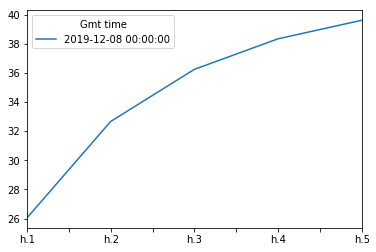

In [16]:
# Plot the final forecast
final.plot()

Question: Is the exchange rate risk expected to increase or decrease over the next 5 days?

Answer: # YOUR ANSWER HERE!